In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [ ]:
import os

dataset_dir = "/content/drive/MyDrive/Project/Dataset"

for cls in os.listdir(dataset_dir):
    cls_path = os.path.join(dataset_dir, cls)
    if os.path.isdir(cls_path):
        print(f"Class '{cls}': {len(os.listdir(cls_path))} images")


Class 'unclear': 57 images
Class 'clear': 64 images


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Project and dataset setup
project_dir = "/content/drive/MyDrive/Project"
dataset_dir = os.path.join(project_dir, "Dataset")
model_path = os.path.join(project_dir, "cnn_weather_model.keras")

os.makedirs(dataset_dir, exist_ok=True)

if not any(os.scandir(dataset_dir)):
    raise FileNotFoundError(f"No class folders found in: {dataset_dir}. Please add 'clear' and 'unclear' folders.")

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# CNN model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),

    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.summary()

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(model_path, save_best_only=True)
]

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)

# Save the trained model
model.save(model_path)
print("Model successfully saved to:", model_path)


Found 98 images belonging to 2 classes.
Found 23 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,530 (400.51 KB)

 Trainable params: 102,082 (398.76 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5693 - loss: 0.8458 - val_accuracy: 0.5652 - val_loss: 0.6938
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6379 - loss: 0.6511 - val_accuracy: 0.6087 - val_loss: 0.6907
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7835 - loss: 0.4985 - val_accuracy: 0.4783 - val_loss: 0.6906
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7745 - loss: 0.5327 - val_accuracy: 0.4783 - val_loss: 0.6913
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7478 - loss: 0.5105 - val_accuracy: 0.4783 - val_loss: 0.6910
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7548 - loss: 0.5200 - val_accuracy: 0.4783 - val_loss: 0.6923
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7813 - loss: 0.5025 - val_accuracy: 0.4783 - val_loss: 0.6954
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.7790 - loss: 0.4711 - val_accuracy: 0.4783 - val_loss: 0.6983
✅ Improved m

# **Model Training for weather done**

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from PIL import UnidentifiedImageError
import cv2

# Load the trained weather classification model
model_path = "/content/drive/MyDrive/Project/cnn_weather_model.keras"
model = load_model(model_path)
print("Weather classification model loaded successfully.")

# Define the prediction function
def predict_weather(img_path):
    # Check if the image file exists
    if not os.path.exists(img_path):
        raise FileNotFoundError(f"Image file not found: {img_path}")

    try:
        # Try loading image with Keras
        img = image.load_img(img_path, target_size=(128, 128))
    except UnidentifiedImageError:
        # Attempt to load with OpenCV to check image validity
        print("Keras could not load the image. Attempting to read with OpenCV...")
        img_cv2 = cv2.imread(img_path)
        if img_cv2 is None:
            raise ValueError("Image file exists but cannot be identified or is corrupted.")
        else:
            raise ValueError("Image is not compatible with Keras' loader. Please convert it to PNG or JPG format.")

    # Process the image for prediction
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    prediction = model.predict(img_array)[0]
    classes = ['clear', 'unclear']
    predicted_class = classes[np.argmax(prediction)]
    confidence = round(100 * np.max(prediction), 2)

    print(f"Predicted class: {predicted_class} (Confidence: {confidence}%)")


Weather classification model loaded successfully.


In [ ]:
test_img_path = "/content/drive/MyDrive/Project/2.jpg"
predict_weather(test_img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Predicted class: unclear (Confidence: 51.61%)


### **SUPER TEST**

In [ ]:
import cv2

edsr_path = "/content/drive/MyDrive/Project/EDSR_x3.pb"

def load_sr_model():
    sr = cv2.dnn_superres.DnnSuperResImpl_create()
    sr.readModel(edsr_path)
    sr.setModel("edsr", 3)  # Upscale factor = 3
    return sr

sr_model = load_sr_model()
print("Super-resolution model loaded.")


Super-resolution model loaded.


✅ Weather classification model loaded.
✅ Super-resolution model loaded.

📌 Predicted weather condition: UNCLEAR
⚙️  Image is unclear. Applying enhancement + super-resolution...


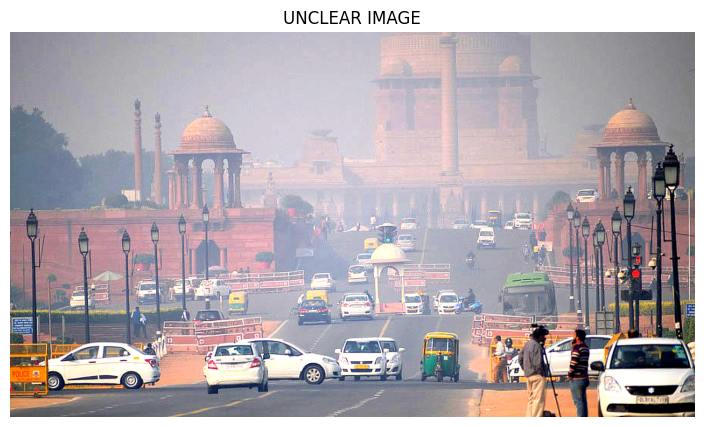

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Paths
weather_model_path = "/content/drive/MyDrive/Project/cnn_weather_model.keras"
edsr_path = "/content/drive/MyDrive/Project/EDSR_x3.pb"
test_img_path = "/content/drive/MyDrive/Project/2.jpg"

# Load weather classification model
weather_model = load_model(weather_model_path)
print("✅ Weather classification model loaded.")

# Load EDSR super-resolution model
def load_sr_model():
    sr = cv2.dnn_superres.DnnSuperResImpl_create()
    sr.readModel(edsr_path)
    sr.setModel("edsr", 2)  # Upscale factor =2
    return sr

sr_model = load_sr_model()
print("✅ Super-resolution model loaded.")

def enhance_image(img):
    # Convert to float for more control
    img = img.astype(np.float32) / 255.0

    # Step 1: Strong exposure drop
    img = np.clip(img * 0.6, 0, 1)

    # Step 2: Aggressive contrast boost
    mean = np.mean(img)
    img = np.clip((img - mean) * 2 + mean, 0, 1)

    # Back to uint8
    img = (img * 255).astype(np.uint8)

    # Step 3: Heavy sharpening kernel (strong distortion style)
    sharpen_kernel = np.array([[ -1, -1, -1],
                               [ -1,  9.5, -1],
                               [ -1, -1, -1]])
    sharp_img = cv2.filter2D(img, -1, sharpen_kernel)

    # Step 4: Optional high-pass filter for extra detail
    blurred = cv2.GaussianBlur(sharp_img, (3, 3), sigmaX=1)
    high_pass = cv2.subtract(sharp_img, blurred)
    enhanced = cv2.addWeighted(sharp_img, 1.2, high_pass, 1.0, 0)

    # Step 5: Final Gaussian blur to keep it a little smooth
    final_img = cv2.GaussianBlur(enhanced, (3, 3), sigmaX=0.5)

    return final_img


# Preprocess image for weather model
def preprocess_for_weather_model(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0
    return np.expand_dims(img, axis=0)

# Main function to check weather and enhance image
def check_and_enhance(img_path, save_output=True):
    input_tensor = preprocess_for_weather_model(img_path)

    # Predict weather condition
    prediction = weather_model.predict(input_tensor, verbose=0)[0]
    classes = ['clear', 'unclear']
    predicted_class = classes[np.argmax(prediction)]

    print(f"\n📌 Predicted weather condition: {predicted_class.upper()}")

    # Load and prepare original image
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    if predicted_class == 'unclear':
        print("⚙️  Image is unclear. Applying enhancement + super-resolution...")
        upscaled_img = sr_model.upsample(original_img)
        enhanced_img = enhance_image(upscaled_img)
    else:
        print("✅ Image is clear. Skipping enhancement.")
        enhanced_img = original_img

    # Show final image
    plt.figure(figsize=(10, 5))
    plt.imshow(enhanced_img)
    plt.axis('off')
    plt.title(f"{predicted_class.upper()} IMAGE")
    plt.show()


# Run the pipeline
check_and_enhance(test_img_path)


### **FACE DETECTION PART**

In [ ]:
import os

# Set your dataset path here
project_dir = "/content/drive/MyDrive/Project"
face_dataset_dir = os.path.join(project_dir, "FACE DATASET")

# Make sure the folder exists
if not os.path.exists(face_dataset_dir):
    raise FileNotFoundError(f"Dataset not found at {face_dataset_dir}")
else:
    print("Dataset directory found:", face_dataset_dir)



Dataset directory found: /content/drive/MyDrive/Project/FACE DATASET


In [ ]:
for cls in os.listdir(face_dataset_dir):
    cls_path = os.path.join(face_dataset_dir, cls)
    if os.path.isdir(cls_path):
        print(f"Class '{cls}': {len(os.listdir(cls_path))} images")

Class 'SATVIK': 82 images
Class 'GUPTA': 14 images


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set dataset directory path
face_dataset_dir = "/content/drive/MyDrive/Project/FACE DATASET"  # Update this path if necessary

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Rescaling only for validation
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    face_dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator
val_generator = val_datagen.flow_from_directory(
    face_dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load VGG16 base model with pre-trained ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

# Build final model
model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Save trained model
model_save_path = "/content/drive/MyDrive/Project/vgg16_face_cnn_model.keras"
model.save(model_save_path)
print("Model successfully saved at:", model_save_path)


Found 76 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_271"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,170,626 (80.76 MB)

 Trainable params: 6,455,938 (24.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 47s 13s/step - accuracy: 0.7449 - loss: 0.5479 - val_accuracy: 0.8889 - val_loss: 0.2862
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.8324 - loss: 0.4497 - val_accuracy: 0.8889 - val_loss: 0.2281
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step - accuracy: 0.8830 - loss: 0.2900 - val_accuracy: 0.9444 - val_loss: 0.2314
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 7s/step - accuracy: 0.8310 - loss: 0.3341 - val_accuracy: 0.9444 - val_loss: 0.1963
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.9321 - loss: 0.2440 - val_accuracy: 0.9444 - val_loss: 0.1782
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.9069 - loss: 0.1871 - val_accuracy: 0.9444 - val_loss: 0.1664
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.9344 - loss: 0.1840 - val_accuracy: 0.8889 - val_loss: 0.1573
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step - accuracy: 0.9623 - loss: 0.1296 - val_accuracy: 0.9444 - val_loss: 0.1427
Epoch 9

# **TESTING**

Face classification model loaded.
dlib face detector loaded.
Choose mode (1: image / 2: video): 2
Best frame extracted and annotated.


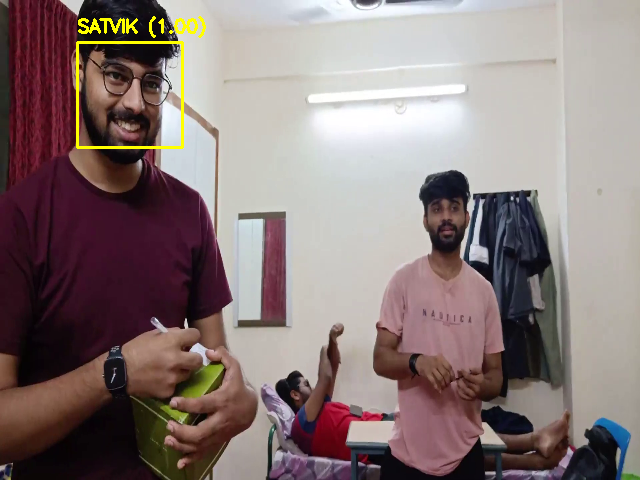

In [ ]:
import cv2
import numpy as np
import os
import time
from tensorflow.keras.models import load_model
import dlib

cnn_model = load_model('/content/drive/MyDrive/Project/vgg16_face_cnn_model.keras')
print("Face classification model loaded.")

class_labels = ['GUPTA', 'SATVIK']

detector = dlib.get_frontal_face_detector()
print("dlib face detector loaded.")

def classify_face(face_img):
    if face_img is None or face_img.size == 0:
        return 'Unknown', 0.0

    try:
        resized = cv2.resize(face_img, (224, 224))  # Ensure correct shape
        resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
        normalized = resized / 255.0
        reshaped = np.expand_dims(normalized, axis=0)
        preds = cnn_model.predict(reshaped, verbose=0)
        predicted_index = np.argmax(preds)
        confidence = preds[0][predicted_index]
        return class_labels[predicted_index], confidence
    except Exception as e:
        print(f"Error in classification: {e}")
        return 'Unknown', 0.0



mode = input("Choose mode (1: image / 2: video): ").strip().lower()

try:
    from google.colab.patches import cv2_imshow
    imshow_func = cv2_imshow
except:
    imshow_func = cv2.imshow

if mode == "1":
    test_folder = '/content/drive/MyDrive/Project/TEST_DATA'

    for filename in os.listdir(test_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(test_folder, filename)
            frame = cv2.imread(img_path)

            if frame is None:
                print(f"Couldn't read: {filename}")
                continue

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = detector(gray)

            for face in faces:
                x, y, w, h = (face.left(), face.top(), face.width(), face.height())
                face_img = frame[y:y+h, x:x+w]
                label, confidence = classify_face(face_img)
                label_text = f'{label} ({confidence:.2f})' if confidence > 0.80 else 'Unknown'
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
                cv2.putText(frame, label_text, (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

            print(f"Processed: {filename}")
            imshow_func(frame)
            time.sleep(2)

elif mode == "2":
    video_path = '/content/drive/MyDrive/Project/TEST_DATA/VID20231111180631 - Trim.mp4'
    cap = cv2.VideoCapture(video_path)

    frame_skip = 5
    frame_count = 0
    best_confidence = 0
    best_frame = None
    best_faces = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_count += 1
        if frame_count % frame_skip != 0:
            continue

        frame_resized = cv2.resize(frame, (640, 480))

        gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            x, y, w, h = (face.left(), face.top(), face.width(), face.height())
            face_img = frame_resized[y:y+h, x:x+w]
            label, confidence = classify_face(face_img)

            if confidence > best_confidence:
                best_confidence = confidence
                best_frame = frame_resized.copy()
                best_faces = [(x, y, w, h, label, confidence)]

    cap.release()

    if best_frame is not None:
        for (x, y, w, h, label, confidence) in best_faces:
            label_text = f'{label} ({confidence:.2f})' if confidence > 0.80 else 'Unknown'
            cv2.rectangle(best_frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
            cv2.putText(best_frame, label_text, (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

        print("Best frame extracted and annotated.")
        imshow_func(best_frame)
    else:
        print("No confident face detected in video.")
